In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import re

In [3]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
waist = 'Waist Circumference, Pref (mm)'
neck='Neck Base Circumference (mm)'
hip= 'Hip Circumference, Maximum (mm)'
chest='Chest Circumference (mm)' #measured just on nipples
crotch_height='Crotch Height (mm)'
shoe_size_italy="Shoe Size IT"

upper_chest='Chest Girth (Chest Circumference at Scye) (mm)' #measured above nipple
italy_upper_chest="Chest Girth at Scye (Chest Circumference at Scye) (mm)"
malleolus_height_outer="Ankle Ht Rt (Malleolus, Lateral) (mm)"
malleolus_height_inner='Malleolus Med Rt (mm)'
outer_inseam='Outer Inseam'

meausred_weight='Weight (kg)'

thigh='Thigh Circumference (mm)'
shoulder_breadth='Shoulder Breadth (mm)'
waist_floor='Waist Height, Preferred (mm)'
arm_length='Arm Length (Shoulder to Wrist) (mm)'

rectangle='Rectangle'
triangle='Triangle'
inverted_triangle='Inverted Triangle'

In [4]:
demographic_path = "./dutch/demographic_metric.csv"
measurement_path = "./dutch/measurement_metric.csv"
extracted_path='./dutch/DutchExtracted.csv'

italy_demographic_path="./italy/ItalyDemographics_csv.csv"
italy_extracted_path='./italy/ItalyExtracted.csv'
italy_demographic_path="ItalyDemographics.csv"
italy_measurement_path="./italy/ItalyMeasurements_csv.csv"

In [5]:
demographic=[subject_number,gender,age, height, weight, shoe_size,pants_size]
extracted=[subject_number,malleolus_height_inner,malleolus_height_outer]
mearuments=[subject_number,waist,chest,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,upper_chest,meausred_weight]
italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy,pants_size]
italy_measurements=[subject_number,waist,chest,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,italy_upper_chest,meausred_weight]
additional=[subject_number,pants_size]

#M_data=pd.read_csv(measurement_path,skipinitialspace=True)

DUTCH

In [6]:
demographic_data=pd.read_csv(demographic_path,skipinitialspace=True,usecols=demographic)
measurement_data=pd.read_csv(measurement_path,skipinitialspace=True,usecols=mearuments)
measurement_data=measurement_data[mearuments]
demographic_data=demographic_data.loc[demographic_data[gender]=='Male'] #shape  Male (567,6) Female (700,6)

data = demographic_data.merge(measurement_data, on=subject_number, how='left') #shape (567, *)

# data = data.drop(subject_number, axis=1)

data=data.drop(gender,axis=1)

dutch_extracted=pd.read_csv(extracted_path,skipinitialspace=True,usecols=extracted)

data=data.merge(dutch_extracted,on=subject_number,how='left')

print(data.shape)

data.head()

(567, 19)


,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,11012,24,206.00,110.00,47,36,916.0,1004.0,506.0,1091.0,1005.0,655.0,505.0,1224.0,712.0,1031.0,107.6,NaN,NaN
1,11024,32,184.00,100.00,45,34,867.0,1099.0,482.0,1090.0,890.0,660.0,535.0,1101.0,672.0,1138.0,98.3,64.89,90.70
2,11025,56,187.00,82.00,44,33,886.0,983.0,492.0,966.0,856.0,571.0,473.0,1067.0,645.0,1004.0,82.7,70.71,93.46
3,11029,60,178.00,98.00,43,38,1036.0,1153.0,500.0,1056.0,797.0,619.0,462.0,1043.0,608.0,1069.0,98.7,71.62,87.41
4,11033,33,184.00,85.00,43,34,930.0,1021.0,575.0,NaN,831.0,610.0,461.0,1049.0,618.0,1039.0,84.0,72.37,91.72


In [7]:
data.dropna(axis=0,how='any',inplace=True) # shape (564,*)
data=data[data[height].str.contains("No Response")==False]
data = data[data[weight].str.contains("No Response") == False]
data = data[data[shoe_size].str.contains("No Response") == False]
data = data[data[pants_size].str.contains("No Response") == False]
total_features=data.shape[1]-1
features = data.columns.tolist()

target = features[-13:] #get last column

    #features = list(set(features) - set([target]))
features = features[:-13]
data[height] = pd.to_numeric(data[height])
data[weight]=pd.to_numeric(data[weight])
data[shoe_size]=pd.to_numeric(data[shoe_size])
data[pants_size]=pd.to_numeric(data[pants_size])
print(features)


['Subject Number', 'Age (Years)', 'Reported Height (cm)', 'Reported Weight (kg)', 'Shoe Size NL', 'Pants Size Waist']


In [8]:
data.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
1,11024,32,184.0,100.0,45.0,34,867.0,1099.0,482.0,1090.0,890.0,660.0,535.0,1101.0,672.0,1138.0,98.3,64.89,90.70
2,11025,56,187.0,82.0,44.0,33,886.0,983.0,492.0,966.0,856.0,571.0,473.0,1067.0,645.0,1004.0,82.7,70.71,93.46
3,11029,60,178.0,98.0,43.0,38,1036.0,1153.0,500.0,1056.0,797.0,619.0,462.0,1043.0,608.0,1069.0,98.7,71.62,87.41
9,11074,45,180.0,70.0,41.0,32,809.0,891.0,464.0,938.0,842.0,558.0,444.0,1071.0,626.0,924.0,68.0,67.71,86.76
12,11099,33,176.0,70.0,42.0,32,850.0,929.0,449.0,963.0,816.0,556.0,445.0,1004.0,637.0,961.0,67.8,68.64,88.00


ITALY


In [9]:

italy_demographic_data=pd.read_csv(italy_demographic_path,skipinitialspace=True,usecols=italy_demographic)
italy_measurement_data=pd.read_csv(italy_measurement_path,skipinitialspace=True,usecols=italy_measurements)
italy_measurement_data.rename(columns = {italy_upper_chest:upper_chest}, inplace = True)
italy_measurement_data=italy_measurement_data[mearuments]
italy_demographic_data=italy_demographic_data.loc[italy_demographic_data[gender]=='Male'] 

italy_demographic_data.columns=[subject_number,age,gender,height,weight,shoe_size,pants_size]
italy_data=italy_demographic_data.merge(italy_measurement_data,on=subject_number,how='left')
italy_extracted=pd.read_csv(italy_extracted_path,skipinitialspace=True,usecols=extracted)

italy_data=italy_data.merge(italy_extracted,on=subject_number,how='left')
#italy_data=italy_data.drop(subject_number,axis=1)
italy_data=italy_data.drop(gender,axis=1)
italy_data.head()


,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,4000,30.5,172.0,72.0,41.0,Don't Know,826.0,965.0,490.0,930.0,794.0,556.0,427.0,995.0,620.0,967.0,71.5,68.0,85.0
1,4001,30.3,175.0,72.0,42.0,Don't Know,814.0,936.0,478.0,967.0,797.0,547.0,447.0,1015.0,625.0,941.0,72.4,70.0,86.0
2,4004,18.1,179.0,67.0,41.0,35.4,787.0,917.0,470.0,940.0,849.0,553.0,410.0,1076.0,613.0,902.0,66.7,72.0,78.0
3,4007,38.0,178.0,76.0,41.5,Don't Know,888.0,1050.0,505.0,1002.0,808.0,579.0,463.0,999.0,640.0,1037.0,77.0,62.0,75.0
4,4011,18.5,173.0,71.0,43.0,29.5,786.0,967.0,504.0,888.0,752.0,536.0,458.0,957.0,598.0,1028.0,69.4,68.0,85.0


In [10]:
print(italy_data.shape)
italy_data=italy_data[italy_data[shoe_size].str.contains("44 or Larger|35 or Smaller")==False]
# italy_data=italy_data[italy_data[pants_size].str.contains("Don't Know|29.5 or Smaller|63 or Larger")==False]
# italy_data = italy_data[italy_data[pants_size].str.contains("No Response") == False]
italy_data.dropna(axis=0,how='any',inplace=True)
italy_data[shoe_size]=pd.to_numeric(italy_data[shoe_size])
# italy_data[pants_size]=pd.to_numeric(italy_data[pants_size])
italy_data.head()
print(italy_data.shape)

(413, 19)
(331, 19)


In [11]:

combined = [data, italy_data]
result = pd.concat(combined)
X = result[features]
y = result[target]
X.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist
1,11024,32.0,184.0,100.0,45.0,34
2,11025,56.0,187.0,82.0,44.0,33
3,11029,60.0,178.0,98.0,43.0,38
9,11074,45.0,180.0,70.0,41.0,32
12,11099,33.0,176.0,70.0,42.0,32


Suggestion for choosing ratio thresholds:
Compute ratios for whole male dataset
Sort them
Find the 33rd and 66th percentiles
They will be values somewhere around 1.1 and 1.2 but at least this way we will know they exactly split the dataset into thirds. By the way, for this you can use the training set - don't need to use test

In [12]:



def check_ratio(upper_chest,waist):
    ratio=upper_chest/waist
    
    if ratio >=1.11 and ratio<=1.17: #1.11 33th percentile, 66 th percentile 1.17
        return pd.Series([rectangle,ratio])
    elif ratio<1.11:
        return pd.Series([triangle,ratio])
    else:
        return pd.Series([inverted_triangle,ratio])

In [13]:
chest_waist=y[[upper_chest,waist]]
#loop through each row and check ratio
chest_waist[['shape','ratio']]=chest_waist.apply(lambda row: check_ratio(row[upper_chest],row[waist]),axis=1)
# print(chest_waist.apply(lambda row: check_ratio(row[upper_chest],row[waist]),axis=1)
# )




/Users/nishantimalsena/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
#count number of each ratio
chest_waist['shape'].value_counts()
chest_waist.head()
#cound number of each ratio
chest_waist['shape'].value_counts()


Inverted Triangle    251
Rectangle            237
Triangle             202
Name: shape, dtype: int64

In [15]:
chest_waist.head()

,Chest Girth (Chest Circumference at Scye) (mm),"Waist Circumference, Pref (mm)",shape,ratio
1,1138.0,867.0,Inverted Triangle,1.312572
2,1004.0,886.0,Rectangle,1.133183
3,1069.0,1036.0,Triangle,1.031853
9,924.0,809.0,Rectangle,1.142151
12,961.0,850.0,Rectangle,1.130588


In [16]:

chest_waist.head()
encoder=preprocessing.OneHotEncoder().fit_transform(chest_waist['shape'].values.reshape(-1,1)).toarray()
#convert list to dataframe
# print(encoder)
chest_waist[inverted_triangle]=encoder[:,0]
chest_waist[rectangle]=encoder[:,1]
chest_waist[triangle]=encoder[:,2]
# encoder=pd.DataFrame(encoder)
# #rename columns
# encoder.columns=[inverted_triangle,rectangle]
# #merge with chest_waist dataframe
# chest_waist=chest_waist.merge(encoder)
chest_waist.head()


/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_52812/313968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_waist[inverted_triangle]=encoder[:,0]
/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_52812/313968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_waist[rectangle]=encoder[:,1]
/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_52812/313968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,Chest Girth (Chest Circumference at Scye) (mm),"Waist Circumference, Pref (mm)",shape,ratio,Inverted Triangle,Rectangle,Triangle
1,1138.0,867.0,Inverted Triangle,1.312572,1.0,0.0,0.0
2,1004.0,886.0,Rectangle,1.133183,0.0,1.0,0.0
3,1069.0,1036.0,Triangle,1.031853,0.0,0.0,1.0
9,924.0,809.0,Rectangle,1.142151,0.0,1.0,0.0
12,961.0,850.0,Rectangle,1.130588,0.0,1.0,0.0


In [17]:
chest_waist=chest_waist.drop(upper_chest,axis=1)
chest_waist=chest_waist.drop(waist,axis=1)
chest_waist.head()


,shape,ratio,Inverted Triangle,Rectangle,Triangle
1,Inverted Triangle,1.312572,1.0,0.0,0.0
2,Rectangle,1.133183,0.0,1.0,0.0
3,Triangle,1.031853,0.0,0.0,1.0
9,Rectangle,1.142151,0.0,1.0,0.0
12,Rectangle,1.130588,0.0,1.0,0.0


In [18]:
# features.append(inverted_triangle)
# features.append(rectangle)
# features.append(triangle)
X=pd.concat([X,chest_waist],axis=1,join='inner')
X.head()
#merge X with chest_waist using index
# X=X.merge(chest_waist,left_index=True)

# X.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,shape,ratio,Inverted Triangle,Rectangle,Triangle
1,11024,32.0,184.0,100.0,45.0,34,Inverted Triangle,1.312572,1.0,0.0,0.0
2,11025,56.0,187.0,82.0,44.0,33,Rectangle,1.133183,0.0,1.0,0.0
3,11029,60.0,178.0,98.0,43.0,38,Triangle,1.031853,0.0,0.0,1.0
9,11074,45.0,180.0,70.0,41.0,32,Rectangle,1.142151,0.0,1.0,0.0
12,11099,33.0,176.0,70.0,42.0,32,Rectangle,1.130588,0.0,1.0,0.0


In [19]:
#Train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
#Train and validation
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.20,random_state=42)

additional_df=pd.concat([X_test[subject_number],X_test[pants_size],X_test['shape']],axis=1)
X_test=X_test.drop(subject_number,axis=1)
X_test=X_test.drop(pants_size,axis=1)
X_train=X_train.drop(subject_number,axis=1)
X_train=X_train.drop(pants_size,axis=1)
X_val=X_val.drop(subject_number,axis=1)
X_val=X_val.drop(pants_size,axis=1)

In [20]:
# training_set=[X_train,y_train]
# training_set = pd.concat(training_set,axis=1)
# sorted=training_set.sort_values(by='ratio')
# s=chest_waist.sort_values(by='ratio')
# print(sorted['ratio'].quantile(0.66))

In [21]:
y_train.head()

,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
190,804.0,864.0,474.0,940.0,792.0,527.0,467.0,1011.0,636.0,897.0,65.4,76.00,83.00
324,875.0,1032.0,468.0,1029.0,860.0,613.0,504.0,1087.0,653.0,1045.0,85.2,69.60,94.46
38,845.0,1033.0,511.0,1011.0,864.0,569.0,498.0,1055.0,622.0,1049.0,80.9,61.51,80.36
117,1080.0,1210.0,494.0,1122.0,912.0,647.0,519.0,1156.0,655.0,1202.0,112.9,81.50,96.00
68,785.0,870.0,455.0,871.0,838.0,477.0,419.0,1006.0,623.0,924.0,56.6,74.00,88.00


In [22]:
X_train.to_csv("X_train.csv",encoding='utf-8',index=False)
y_train.to_csv("y_train.csv",encoding='utf-8',index=False)

X_test.to_csv("X_test.csv",encoding='utf-8',index=False)
y_test.to_csv("y_test.csv",encoding='utf-8',index=False)

X_val.to_csv("X_val.csv",encoding='utf-8',index=False)
y_val.to_csv("y_val.csv",encoding='utf-8',index=False)

additional_df.to_csv("additional_df.csv",encoding='utf-8',index=False)

In [23]:
#read csv file
test=pd.read_csv("X_test.csv",encoding='utf-8')
test.head()

,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,shape,ratio,Inverted Triangle,Rectangle,Triangle
0,18.0,183.0,70.0,45.0,Rectangle,1.158213,0.0,1.0,0.0
1,18.9,186.0,65.0,43.0,Rectangle,1.130829,0.0,1.0,0.0
2,26.0,183.0,79.0,43.0,Rectangle,1.155193,0.0,1.0,0.0
3,26.0,191.0,104.0,42.0,Inverted Triangle,1.192964,1.0,0.0,0.0
4,20.0,185.0,79.0,43.0,Inverted Triangle,1.218551,1.0,0.0,0.0


In [24]:
additional_df.head()

,Subject Number,Pants Size Waist,shape
486,16783,32,Rectangle
192,4346,31.5,Rectangle
444,16674,32,Rectangle
541,17046,36,Inverted Triangle
520,16892,32,Inverted Triangle


In [25]:
y_test.head()

,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
486,828.0,911.0,466.0,942.0,858.0,545.0,455.0,1036.0,664.0,959.0,67.0,71.33,92.52
192,772.0,858.0,461.0,936.0,841.0,513.0,409.0,1043.0,627.0,873.0,63.9,66.00,82.00
444,857.0,948.0,472.0,1018.0,874.0,559.0,471.0,1110.0,678.0,990.0,77.1,78.41,85.86
541,938.0,1122.0,520.0,1118.0,864.0,662.0,526.0,1095.0,659.0,1119.0,101.3,74.89,86.36
520,787.0,934.0,453.0,1030.0,887.0,600.0,462.0,1102.0,649.0,959.0,79.5,80.91,101.39


In [26]:
measurement_data.head()

,Subject Number,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),Weight (kg)
0,11001,724.0,904.0,444.0,1000.0,799.0,565.0,406.0,1053.0,603.0,844.0,60.9
1,11002,690.0,859.0,401.0,1027.0,754.0,607.0,429.0,1004.0,566.0,870.0,63.2
2,11009,1014.0,1092.0,452.0,1135.0,739.0,654.0,460.0,1014.0,573.0,1011.0,85.0
3,11012,916.0,1004.0,506.0,1091.0,1005.0,655.0,505.0,1224.0,712.0,1031.0,107.6
4,11017,755.0,898.0,438.0,985.0,808.0,579.0,432.0,1014.0,568.0,891.0,61.3


In [27]:
# def  isWithInPercentage(chest,waist,range):
#     p=0
#     p=(abs(chest-waist)/(((chest+waist))/2))
#     # p = abs(chest - waist)/max(chest, waist) 
#     print(p)
#     print(p<=range/100)
    

In [28]:
def plot_eplorror_distribution(array):
    plt.subplots(figsize=(8,5))
    #Set X-Axis range
    
    plt.title('Model Error Distribution')
    plt.ylabel('No. of Predictions')
    plt.xlabel('Error (cm)')
    plt.hist(array)
    plt.show()

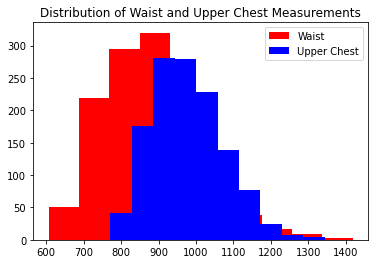

In [29]:
plt.hist(measurement_data[waist], color='red')
plt.hist(measurement_data[upper_chest],  color='blue')
  
plt.title("Distribution of Waist and Upper Chest Measurements")
  
plt.legend([ 'Waist', 'Upper Chest'])
  
plt.show()

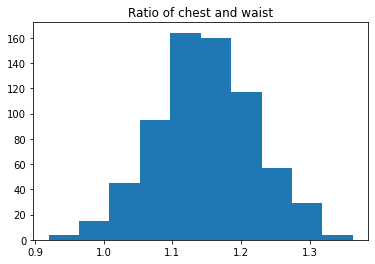

In [30]:
ratio=result[upper_chest]/result[waist]
plt.hist(ratio)
plt.title("Ratio of chest and waist")
  

  
plt.show()